In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#
#
# Problem 1: Cancer Naive Bayes w/ Standardization
#
#
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancerData = cancer.data
cancerTable = pd.DataFrame(cancerData)
cancerTable.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
diag = cancer.target
diag[:5]

array([0, 0, 0, 0, 0])

In [114]:
diag = np.reshape(diag,(569,1))
finalCancerData = np.concatenate([cancerData,diag], axis=1)
finalCancerData.shape

(569, 31)

In [115]:
finalCancerTable = pd.DataFrame(finalCancerData)
features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [116]:
finalFeatures = np.append(features, 'diagnosis')
finalCancerTable.columns = finalFeatures
finalCancerTable.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [117]:
X = finalCancerTable.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values
Y = finalCancerTable.iloc[:, 30].values
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [118]:
#split raw data into training and validation sets
from sklearn.model_selection import train_test_split
np.random.seed(0) 
trainX, validX, trainY, validY = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(trainX[:5])
print(trainY[:5])

[[1.005e+01 1.753e+01 6.441e+01 3.108e+02 1.007e-01 7.326e-02 2.511e-02
  1.775e-02 1.890e-01 6.331e-02 2.619e-01 2.015e+00 1.778e+00 1.685e+01
  7.803e-03 1.449e-02 1.690e-02 8.043e-03 2.100e-02 2.778e-03 1.116e+01
  2.684e+01 7.198e+01 3.840e+02 1.402e-01 1.402e-01 1.055e-01 6.499e-02
  2.894e-01 7.664e-02]
 [1.080e+01 2.198e+01 6.879e+01 3.599e+02 8.801e-02 5.743e-02 3.614e-02
  1.404e-02 2.016e-01 5.977e-02 3.077e-01 1.621e+00 2.240e+00 2.020e+01
  6.543e-03 2.148e-02 2.991e-02 1.045e-02 1.844e-02 2.690e-03 1.276e+01
  3.204e+01 8.369e+01 4.895e+02 1.303e-01 1.696e-01 1.927e-01 7.485e-02
  2.965e-01 7.662e-02]
 [1.614e+01 1.486e+01 1.043e+02 8.000e+02 9.495e-02 8.501e-02 5.500e-02
  4.528e-02 1.735e-01 5.875e-02 2.387e-01 6.372e-01 1.729e+00 2.183e+01
  3.958e-03 1.246e-02 1.831e-02 8.747e-03 1.500e-02 1.621e-03 1.771e+01
  1.958e+01 1.159e+02 9.479e+02 1.206e-01 1.722e-01 2.310e-01 1.129e-01
  2.778e-01 7.012e-02]
 [1.218e+01 1.784e+01 7.779e+01 4.511e+02 1.045e-01 7.057e-02 2.490

In [119]:
# Standardize the data first
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

standard = StandardScaler()
trainX = standard.fit_transform(trainX)   #standardize training x data
validX = standard.fit_transform(validX)   #standardize validation x data
print('Standardized training x:')
print(trainX[:5])
print('Training y:')
trainY[:5] #non-standardized

Standardized training x:
[[-1.15036482 -0.39064196 -1.12855021 -0.95876358  0.3109837  -0.5959945
  -0.80259612 -0.80249002  0.29453906  0.0942515  -0.4950523   1.48720153
  -0.51448782 -0.49154005  0.28149837 -0.60451206 -0.46900701 -0.61170002
   0.05798237 -0.35763702 -1.0431756   0.21353282 -1.0360446  -0.84880771
   0.34249851 -0.73009743 -0.81232053 -0.75798367 -0.01614761 -0.38503402]
 [-0.93798972  0.68051405 -0.94820146 -0.82152548 -0.60963604 -0.90986721
  -0.66066905 -0.89871612  0.75493453 -0.42547082 -0.33381757  0.75941203
  -0.28751805 -0.42127695 -0.1620797  -0.20486693 -0.05029632 -0.20309076
  -0.25469005 -0.39139463 -0.71565415  1.06684183 -0.68992205 -0.66869703
  -0.09553745 -0.53786647 -0.37504806 -0.60687023  0.09669004 -0.38615797]
 [ 0.574121   -1.03333557  0.51394098  0.40858627 -0.10616078 -0.36301886
  -0.41799048 -0.08844569 -0.27182044 -0.57522132 -0.57672579 -1.05784511
  -0.53856037 -0.38708923 -1.07211882 -0.72057496 -0.42362791 -0.49218988
  -0.6748436

array([1., 1., 1., 1., 1.])

In [120]:
# Now train the Naive Bayes model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(trainX, trainY)
expected = validY
predicted = model.predict(validX)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        47
         1.0       0.94      0.96      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

[[43  4]
 [ 3 64]]


In [121]:
#
#
# Problem 2: Cancer Logisitic Regression Feature Reduction
#              with Standardization
#
stdX = standard.fit_transform(X)  #standardize all x data first
print('All standardized x data:')
stdX[:5]

All standardized x data:


array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [122]:
from sklearn.decomposition import PCA

accuracyHistory = np.zeros(31)
precisionHistory = np.zeros(31)
recallHistory = np.zeros(31)
# Big for loop for finding best K component reduction
for i in range(1,31):
    pca = PCA(n_components=i)                   #reduce to i number of components/variables
    principalComps = pca.fit_transform(stdX)    #feed stdized x data to get i principal components
    
    np.random.seed(0) #split new components and Y datas into training and validation sets
    trainX, validX, trainY, validY = train_test_split(principalComps, Y, test_size = 0.2, random_state=0)
    
    classifier = LogisticRegression(random_state=0) #create logistic regression
    classifier.fit(trainX, trainY)
    
    predictedY = classifier.predict(validX) #predict result based on classifier
    
    accuracyHistory[i] = metrics.accuracy_score(validY, predictedY)
    precisionHistory[i] = metrics.precision_score(validY, predictedY)
    recallHistory[i] = metrics.recall_score(validY, predictedY)
    
    print('K=', i, ':', accuracyHistory[i])


K= 1 : 0.9035087719298246
K= 2 : 0.9298245614035088
K= 3 : 0.9122807017543859
K= 4 : 0.9473684210526315
K= 5 : 0.956140350877193
K= 6 : 0.956140350877193
K= 7 : 0.956140350877193
K= 8 : 0.956140350877193
K= 9 : 0.9473684210526315
K= 10 : 0.9473684210526315
K= 11 : 0.9649122807017544
K= 12 : 0.9649122807017544
K= 13 : 0.9649122807017544
K= 14 : 0.9649122807017544
K= 15 : 0.9649122807017544
K= 16 : 0.9649122807017544
K= 17 : 0.9649122807017544
K= 18 : 0.9649122807017544
K= 19 : 0.9649122807017544
K= 20 : 0.9649122807017544
K= 21 : 0.9649122807017544
K= 22 : 0.9649122807017544
K= 23 : 0.9649122807017544
K= 24 : 0.9649122807017544
K= 25 : 0.9649122807017544
K= 26 : 0.9649122807017544
K= 27 : 0.9649122807017544
K= 28 : 0.9649122807017544
K= 29 : 0.9649122807017544
K= 30 : 0.9649122807017544


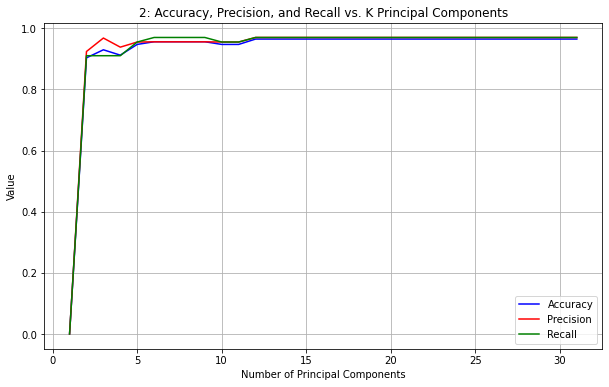

In [123]:
plt.plot(range(1, 32), accuracyHistory, color = 'blue', label = 'Accuracy')
plt.plot(range(1, 32), precisionHistory, color = 'red', label = 'Precision')
plt.plot(range(1, 32), recallHistory, color = 'green', label = 'Recall')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Principal Components') 
plt.ylabel('Value') 
plt.title('2: Accuracy, Precision, and Recall vs. K Principal Components') 
plt.legend()

In [124]:
#
#
# Problem 3: Cancer Naive Bayes Feature Reduction
#              with Standardization
#
print('All standardized x data:')
stdX[:5]

All standardized x data:


array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [125]:
accuracyHistory = np.zeros(31)
precisionHistory = np.zeros(31)
recallHistory = np.zeros(31)
# Big for loop for finding best K component reduction
for i in range(1,31):
    pca = PCA(n_components=i)                   #reduce to i number of components/variables
    principalComps = pca.fit_transform(stdX)    #feed stdized x data to get i principal components
    
    np.random.seed(0) #split new components and Y datas into training and validation sets
    trainX, validX, trainY, validY = train_test_split(principalComps, Y, test_size = 0.2, random_state=0)
    
    model = GaussianNB()        #create Bayes model
    model.fit(trainX, trainY)
    
    expected = validY
    predicted = model.predict(validX)
    
    accuracyHistory[i] = metrics.accuracy_score(expected, predicted)
    precisionHistory[i] = metrics.precision_score(expected, predicted)
    recallHistory[i] = metrics.recall_score(expected, predicted)
    
    print('K=', i, ':', accuracyHistory[i])


K= 1 : 0.9035087719298246
K= 2 : 0.9122807017543859
K= 3 : 0.9035087719298246
K= 4 : 0.9035087719298246
K= 5 : 0.9210526315789473
K= 6 : 0.9210526315789473
K= 7 : 0.9122807017543859
K= 8 : 0.9122807017543859
K= 9 : 0.9122807017543859
K= 10 : 0.9122807017543859
K= 11 : 0.9122807017543859
K= 12 : 0.9122807017543859
K= 13 : 0.9122807017543859
K= 14 : 0.9122807017543859
K= 15 : 0.9035087719298246
K= 16 : 0.9122807017543859
K= 17 : 0.8947368421052632
K= 18 : 0.8947368421052632
K= 19 : 0.8947368421052632
K= 20 : 0.8947368421052632
K= 21 : 0.8947368421052632
K= 22 : 0.8859649122807017
K= 23 : 0.868421052631579
K= 24 : 0.8771929824561403
K= 25 : 0.8771929824561403
K= 26 : 0.8596491228070176
K= 27 : 0.8596491228070176
K= 28 : 0.8421052631578947
K= 29 : 0.8333333333333334
K= 30 : 0.8421052631578947


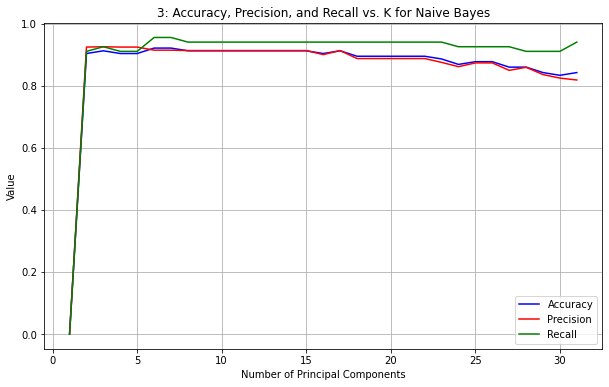

In [126]:
plt.plot(range(1, 32), accuracyHistory, color = 'blue', label = 'Accuracy')
plt.plot(range(1, 32), precisionHistory, color = 'red', label = 'Precision')
plt.plot(range(1, 32), recallHistory, color = 'green', label = 'Recall')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Principal Components') 
plt.ylabel('Value') 
plt.title('3: Accuracy, Precision, and Recall vs. K for Naive Bayes') 
plt.legend()